<a href="https://colab.research.google.com/github/YazCodes/Deep-Learning-projects/blob/main/Prediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DQN for cartpole

In [1]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2

     |████████████████████████████████| 61kB 3.1MB/s 


In [2]:
!pip install gym

In [4]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

In [5]:
print(env.observation_space.shape) #gives us a tupel. 0 is the first element of the tupel

(4,)


In [6]:
#number of actions 
print(env.action_space.n)

2


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None
Training for 10000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   17/10000: episode: 1, duration: 0.512s, episode steps:  17, steps per second:  33, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.647 [0.000, 1.000],  loss: 0.577095, mae: 0.638507, mean_q: 0.254334, mean_tau: 0.998785
   44/10000: episode: 2, duration: 0.182s, episode steps:  27, steps per second: 148, episode reward: 27.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.556 [0.000, 1.000],  loss: 0.452965, mae: 0.622560, mean_q: 0.362587, mean_tau: 0.997300


/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   55/10000: episode: 3, duration: 0.086s, episode steps:  11, steps per second: 128, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.375977, mae: 0.604610, mean_q: 0.428774, mean_tau: 0.995590
   74/10000: episode: 4, duration: 0.124s, episode steps:  19, steps per second: 153, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.421 [0.000, 1.000],  loss: 0.396759, mae: 0.661294, mean_q: 0.559907, mean_tau: 0.994240
  133/10000: episode: 5, duration: 0.380s, episode steps:  59, steps per second: 155, episode reward: 59.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.525 [0.000, 1.000],  loss: 0.417894, mae: 0.682793, mean_q: 0.690476, mean_tau: 0.990730
  182/10000: episode: 6, duration: 0.310s, episode steps:  49, steps per second: 158, episode reward: 49.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.531 [0.000, 1.000],  loss: 0.352848, mae: 0.733916, mean_q: 0.924944, mean_tau: 0

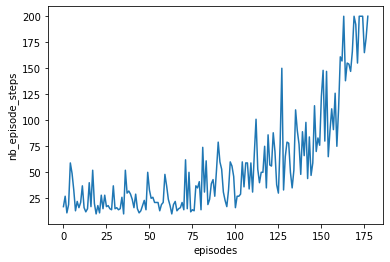

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [8]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import BoltzmannQPolicy, LinearAnnealedPolicy  # import the policy
from rl.agents.dqn import DQNAgent      # import the DQN agent

memory = SequentialMemory(limit=10000, window_length=1) #setting up the experince replay buffer
#limit = the numer of steps of episodes stored in the replay buffer

# define the policy (how we select the actions)
# setup the Linear annealed policy with the BoltzmannQPolicy as the inner policy
policy =  LinearAnnealedPolicy(inner_policy=BoltzmannQPolicy(),   # policy used to select actions
                               attr='tau',                        # attribute in the inner policy to vary             
                               value_max=1,                       # maximum value of attribute that is varying
                               value_min=.1,                      # minimum value of attribute that is varying
                               value_test=.05,                    # test if the value selected is < 0.05
                               nb_steps=10000)                    # the number of steps between value_max and value_min
#BoltzmannQPolicy has a paramaeter tau the higher the value of tau more exploaration will be down. Lower value = less exploration
#default value of tau is one -
#need to change the value_max and value_min. 
# Q-Network
model = Sequential() #sequnetial model 
model.add(Input(shape=(1,env.observation_space.shape[0]))) # 1 = one observation and env.observation_space.shape is the number of states within our observation. 0 = the first element of the tupel
model.add(Flatten())
# extra layers here
model.add(Dense(16, activation='relu')) #one layer network
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space. Activation has to be linear due to how the q value does its calculation
print(model.summary())

# define the agent using the DQNAgent class
dqn = DQNAgent(model=model,                     # Q-Network model created above ^
               nb_actions=env.action_space.n,   # number of actions used above - the data from the enviroment
               memory=memory,                   # experience replay memory
               nb_steps_warmup=10,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2) #visualize false to save time

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False) #testing for 20 episodes, reward should all be 200- evaluating my algortithm 